In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics



In [2]:
airlines = pd.read_excel('F:\\Data Science\\Data sets\\EWAirlines.xlsx')
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
#EDA
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award'}>]], dtype=object)

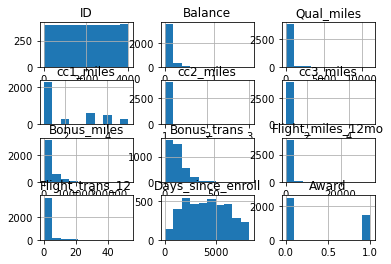

In [5]:
airlines.hist()

<AxesSubplot:>

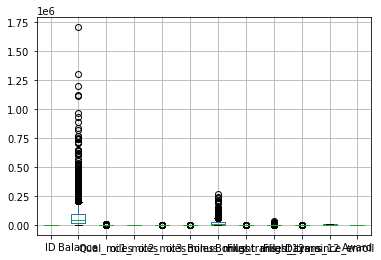

In [6]:
airlines.boxplot()

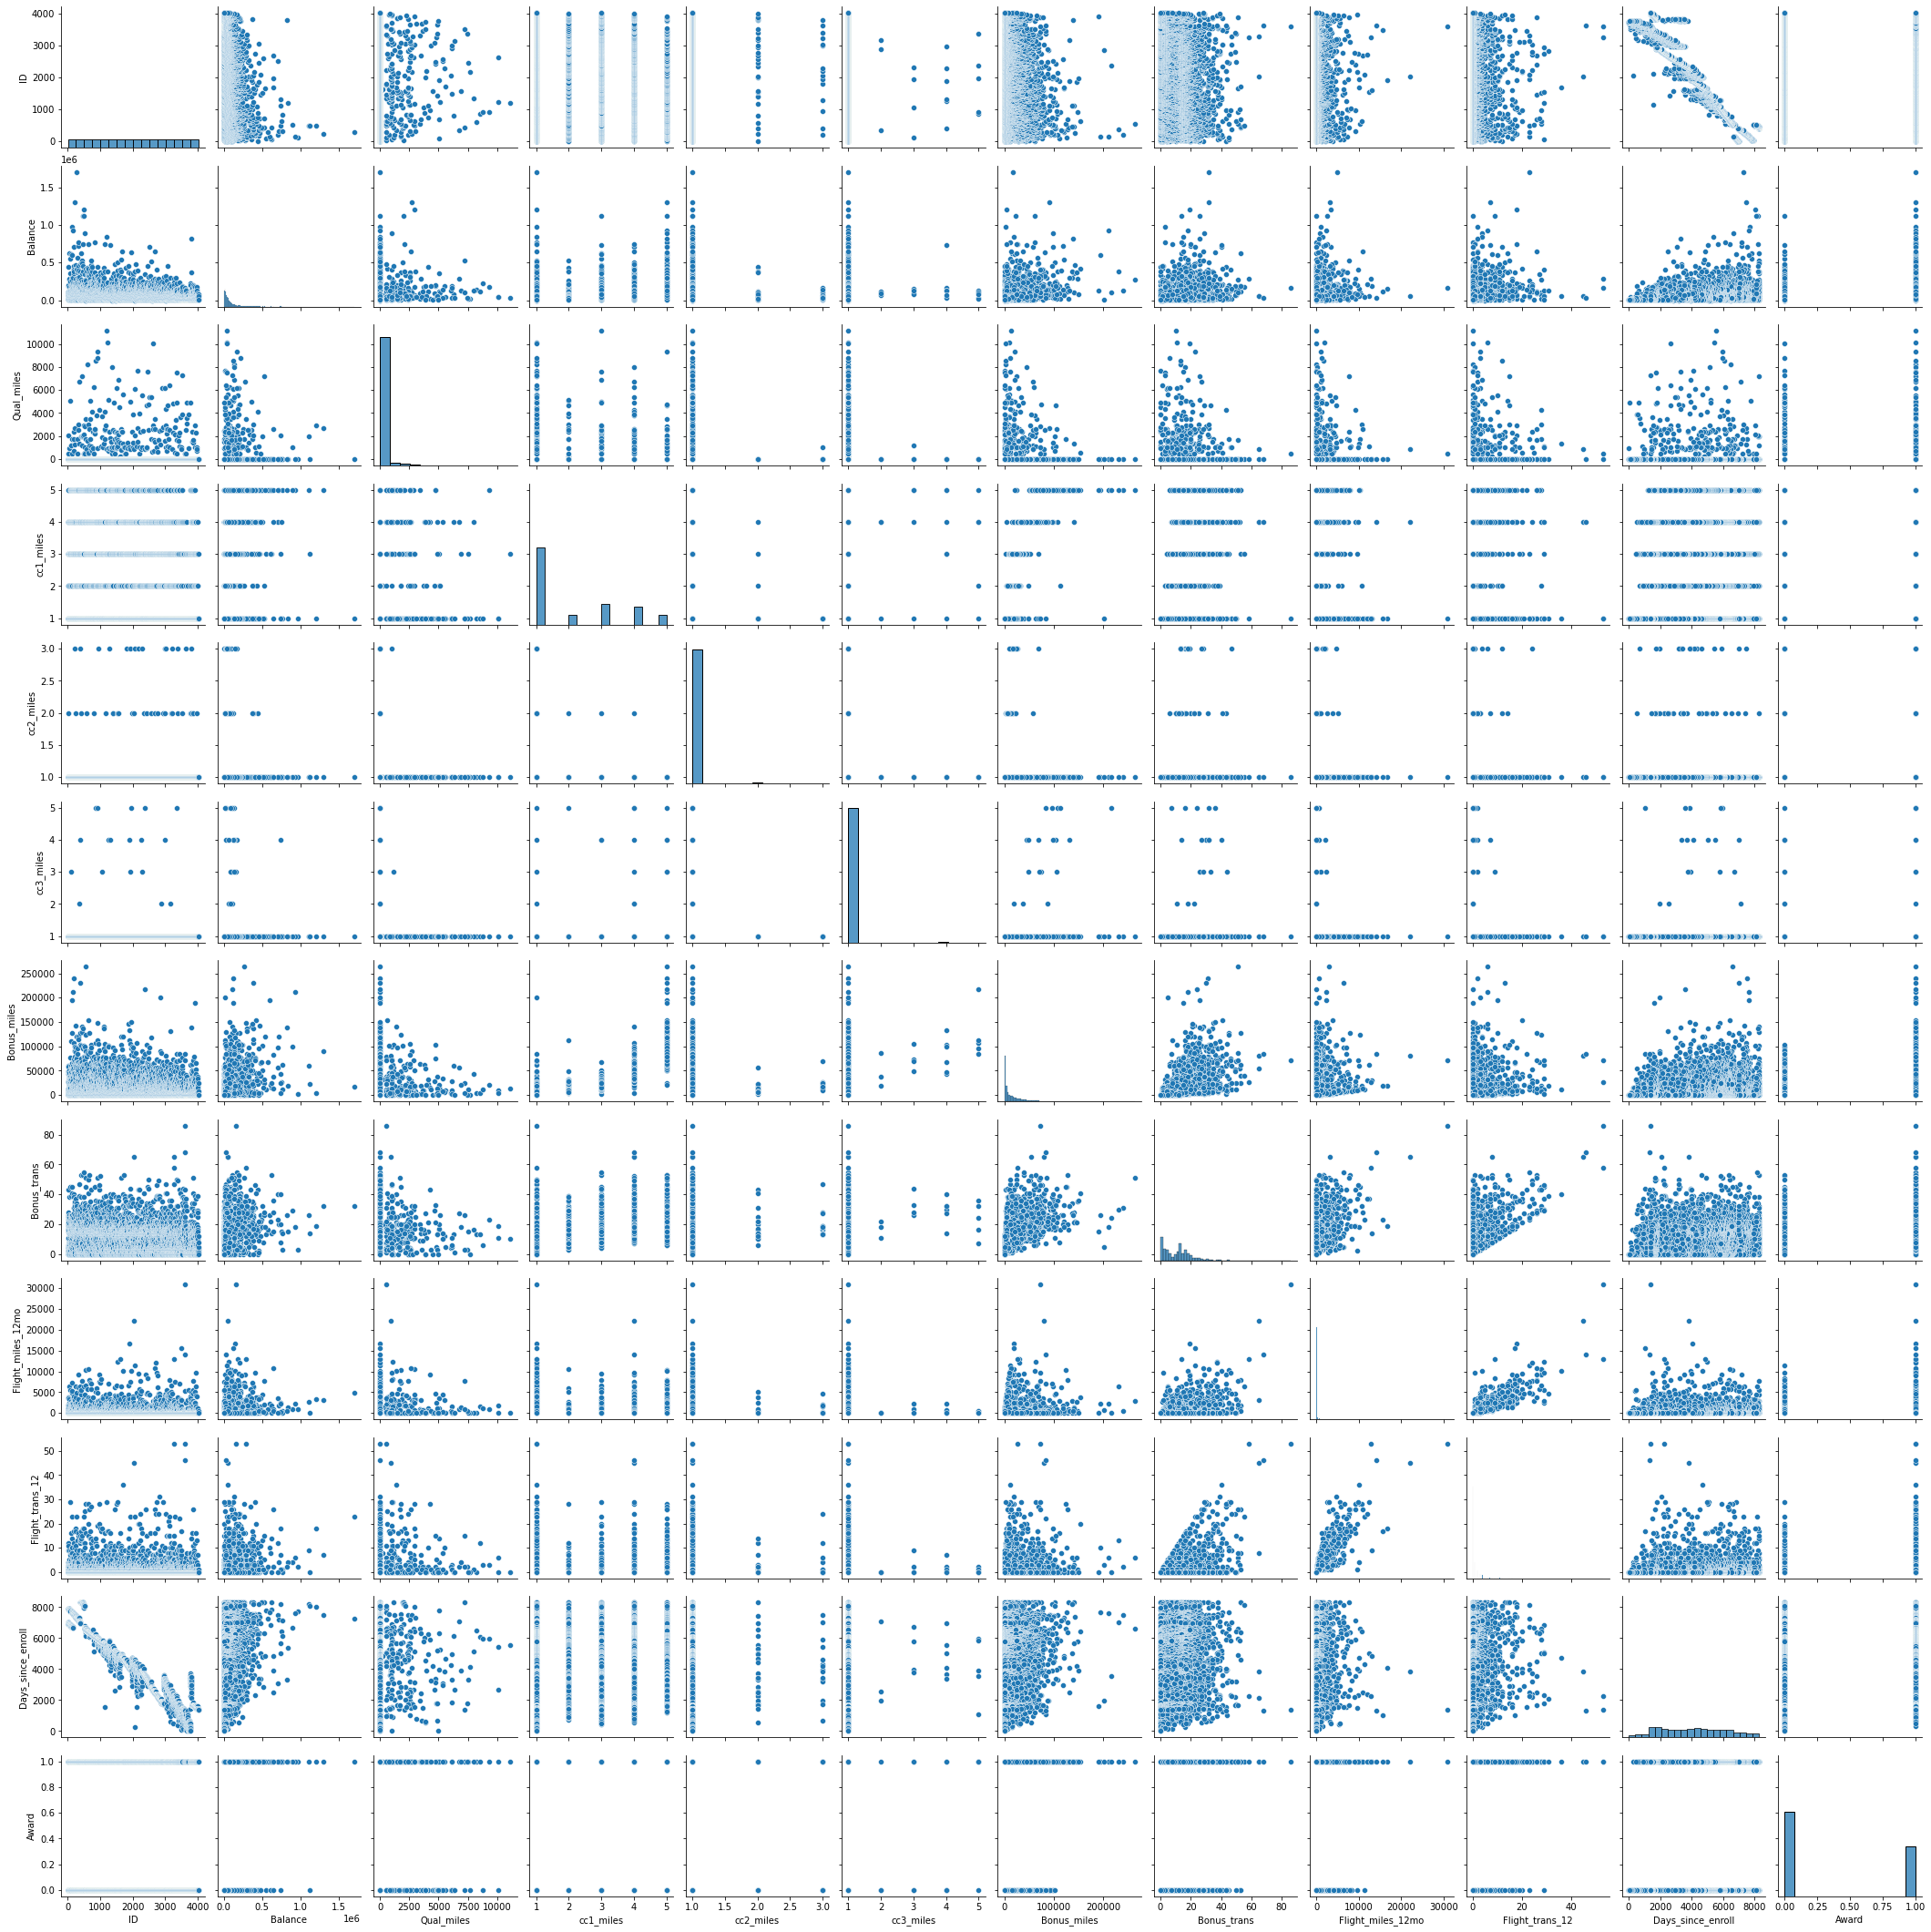

In [9]:
sns.pairplot(airlines)

In [10]:
#Normalization function
def minmax_func(i):
    x = i-i.min()/(i.max()-i.min())
    return(x)

In [11]:
df_norm = minmax_func(airlines.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0


### Hierarchical Clustering

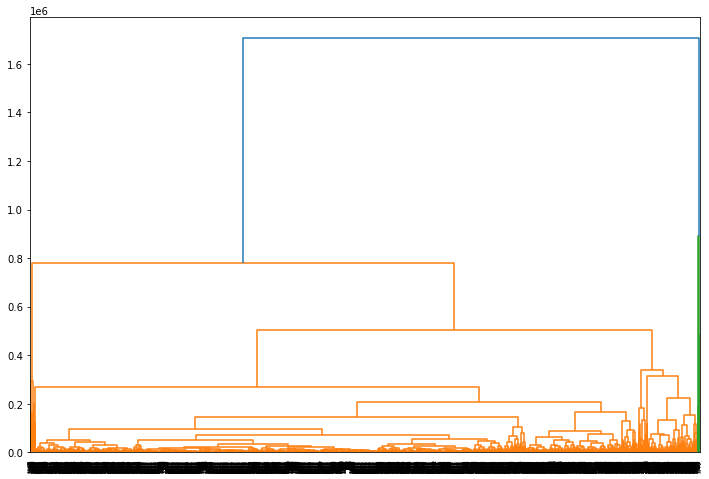

In [19]:
# Create dendrogram
plt.figure(figsize = (12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method ='complete'))

In [42]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [43]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [44]:
airlines['h_clusters']=pd.DataFrame(y_hc)

In [45]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [46]:
airlines['h_clusters'].value_counts()

4    3607
0     356
1      26
3       5
2       4
5       1
Name: h_clusters, dtype: int64

In [47]:
airlines['h_clusters'] = airlines['h_clusters'].replace(0, 'cluster 1')
airlines['h_clusters'] = airlines['h_clusters'].replace(1, 'cluster 2')
airlines['h_clusters'] = airlines['h_clusters'].replace(2, 'cluster 3')
airlines['h_clusters'] = airlines['h_clusters'].replace(3, 'cluster 4')
airlines['h_clusters'] = airlines['h_clusters'].replace(4, 'cluster 5')
airlines['h_clusters'] = airlines['h_clusters'].replace(5, 'cluster 6')
airlines = airlines.drop(['ID'], axis = 1)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,cluster 5
1,19244,0,1,1,1,215,2,0,0,6968,0,cluster 5
2,41354,0,1,1,1,4123,4,0,0,7034,0,cluster 5
3,14776,0,1,1,1,500,1,0,0,6952,0,cluster 5
4,97752,0,4,1,1,43300,26,2077,4,6935,1,cluster 5
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,cluster 5
3995,64385,0,1,1,1,981,5,0,0,1395,1,cluster 5
3996,73597,0,3,1,1,25447,8,0,0,1402,1,cluster 5
3997,54899,0,1,1,1,500,1,500,1,1401,0,cluster 5


In [48]:
airlines.groupby('h_clusters').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusters,,,,,,,,,,,
cluster 1,2.511808e+05,360.617978,2.867978,1.014045,1.000000,35303.438202,18.022472,1160.098315,3.452247,5226.303371,0.536517
cluster 2,6.239561e+05,531.846154,3.461538,1.000000,1.115385,53774.961538,22.500000,1784.384615,5.846154,6303.500000,0.807692
cluster 3,1.184935e+06,1910.000000,3.500000,1.000000,1.000000,44595.500000,22.750000,2237.500000,8.500000,7956.250000,0.750000
cluster 4,8.899450e+05,204.800000,3.400000,1.000000,1.000000,93889.800000,18.200000,1230.000000,3.600000,6134.200000,1.000000
cluster 5,4.929143e+04,117.948988,1.966454,1.014694,1.012753,14951.795952,10.862490,377.169670,1.119213,3985.551705,0.349321
cluster 6,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000


After many trial and error method of changing number of clusters, except for cc1, cc2, cc3 columns, other columns have significant differences of means between every clusters.

### K Means

In [49]:
airline = pd.read_excel('F:\\Data Science\\Data sets\\EWAirlines.xlsx')
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
airline.drop(['ID'], axis = 1, inplace = True)
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [51]:
scaler = StandardScaler()
scaled_airline = scaler.fit_transform(airline.iloc[:,0:])

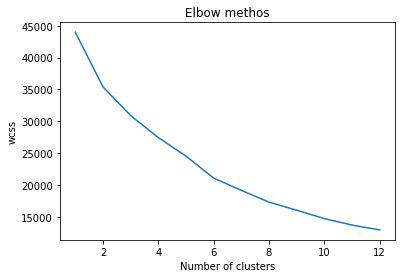

In [54]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_airline)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,13), wcss)
plt.title('Elbow methos')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [56]:
clusters_new = KMeans(6, random_state = 0)
clusters_new.fit(scaled_airline)

KMeans(n_clusters=6, random_state=0)

In [57]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [58]:
airline['k_clusters'] = clusters_new.labels_

In [61]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [63]:
airline['k_clusters'].value_counts()

2    2494
1    1243
0     143
5      61
3      43
4      15
Name: k_clusters, dtype: int64

In [64]:
airline['k_clusters'] = airline['k_clusters'].replace(0, 'cluster 1')
airline['k_clusters'] = airline['k_clusters'].replace(1, 'cluster 2')
airline['k_clusters'] = airline['k_clusters'].replace(2, 'cluster 3')
airline['k_clusters'] = airline['k_clusters'].replace(3, 'cluster 4')
airline['k_clusters'] = airline['k_clusters'].replace(4, 'cluster 5')
airline['k_clusters'] = airline['k_clusters'].replace(5, 'cluster 6')
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,cluster 3
1,19244,0,1,1,1,215,2,0,0,6968,0,cluster 3
2,41354,0,1,1,1,4123,4,0,0,7034,0,cluster 3
3,14776,0,1,1,1,500,1,0,0,6952,0,cluster 3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,cluster 3
3995,64385,0,1,1,1,981,5,0,0,1395,1,cluster 3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,cluster 2
3997,54899,0,1,1,1,500,1,500,1,1401,0,cluster 3


In [65]:
clusters_new.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [66]:
airline.groupby('k_clusters').agg('mean').reset_index()

,k_clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,cluster 1,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,cluster 2,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,cluster 3,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,cluster 4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,cluster 5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,cluster 6,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


There is significant differences of mean in between most of the clusters.

### DBSCAN

In [67]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,cluster 5
1,19244,0,1,1,1,215,2,0,0,6968,0,cluster 5
2,41354,0,1,1,1,4123,4,0,0,7034,0,cluster 5
3,14776,0,1,1,1,500,1,0,0,6952,0,cluster 5
4,97752,0,4,1,1,43300,26,2077,4,6935,1,cluster 5


In [69]:
airlines1 = airlines.drop(['h_clusters'],axis =1)
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [72]:
array = airlines1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [73]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [235]:
dbscan = DBSCAN(eps = 10, min_samples = 13)
dbscan.fit(X)

DBSCAN(eps=10, min_samples=13)

In [236]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [237]:
airlines1['d_clusters'] = dbscan.labels_ 

In [238]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,d_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [239]:
airlines1['d_clusters'].value_counts()

 0    3998
-1       1
Name: d_clusters, dtype: int64

In [240]:
(len(airlines1[airlines1['d_clusters']==-1])/len(airlines1))*100

0.025006251562890724

In [241]:
Y = metrics.silhouette_score(X, dbscan.labels_)
Y

0.8562820070415407

In [244]:
def dbscan(Y, eps, min_samples):
    ss = StandardScaler()
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(Y)
    y_pred = db.fit_predict(Y)
    plt.scatter(Y[:,0], Y[:,1], c=y_pred, cmap= 'Paired')
    plt.title('DBSCAN')

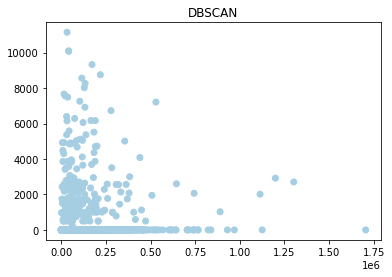

In [245]:
dbscan(array, 10, 13)